# 91APP HW

In this assignment, we'd be investigating the trends and relationship between customers and revenue for 91APP.

We start by loading the data. (For simplicity, only Orders.csv and Member.csv are loaded)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.font_manager as mfm
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import ScalarFormatter,FormatStrFormatter
from datetime import datetime

In [16]:
font_path = "SourceHanSerifTC-Medium.otf"
prop = mfm.FontProperties(fname=font_path)

In [3]:
df_orders = pd.read_csv('Orders.csv', header = 0, dtype = {'DateId':'Int64',
                                                           'MemberId':'Int64',
                                                           'OrderGroupCode':'str',
                                                           'TrackSourceTypeDef':'str',
                                                           'TrackDeviceTypeDef':'str',
                                                           'PayProfileTypeDef':'str',
                                                           'SalesOrderSlaveId':'Int64',
                                                           'SalePageId':'Int64',
                                                           'IsMajor':'bool',
                                                           'IsGift':'bool',
                                                           'IsSalePageGift':'bool',
                                                           'Quantity':'Int64',
                                                           'UnitPrice':'float',
                                                           'PromotionDiscount':'float',
                                                           'ECouponId':'Int64',
                                                           'ECouponDiscount':'float',
                                                           'SalesOrderSlaveTotalPayment':'float',
                                                           'SalesOrderSlaveDateTime':'str',
                                                           'SalesOrderReceiverId':'Int64',
                                                           'City':'str',
                                                           'District':'str',
                                                           'ZipCode':'Int64',
                                                           'StoreName':'str',
                                                           'StoreId':'str',
                                                           'DeliverTypeDef':'str',
                                                           'StatusDef':'str',
                                                           'ReturnGoodsDateId':'Int64',
                                                           'CauseDef':'str'}, parse_dates = ['SalesOrderSlaveDateTime'])
print(list(df_orders))
df_orders.head()

['DateId', 'MemberId', 'OrderGroupCode', 'TrackSourceTypeDef', 'TrackDeviceTypeDef', 'PayProfileTypeDef', 'SalesOrderSlaveId', 'SalePageId', 'IsMajor', 'IsGift', 'IsSalePageGift', 'Quantity', 'UnitPrice', 'PromotionDiscount', 'ECouponId', 'ECouponDiscount', 'SalesOrderSlaveTotalPayment', 'SalesOrderSlaveDateTime', 'SalesOrderReceiverId', 'City', 'District', 'ZipCode', 'StoreName', 'StoreId', 'DeliverTypeDef', 'StatusDef', 'ReturnGoodsDateId', 'CauseDef']


,DateId,MemberId,OrderGroupCode,TrackSourceTypeDef,TrackDeviceTypeDef,PayProfileTypeDef,SalesOrderSlaveId,SalePageId,IsMajor,IsGift,...,SalesOrderReceiverId,City,District,ZipCode,StoreName,StoreId,DeliverTypeDef,StatusDef,ReturnGoodsDateId,CauseDef
0,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457777,1242871,True,False,...,1480890,嘉義縣,水上鄉,608,中庄門市,910828,SevenEleven,Finish,NaN,NaN
1,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457778,1242880,True,False,...,1480890,嘉義縣,水上鄉,608,中庄門市,910828,SevenEleven,Finish,NaN,NaN
2,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457779,1242880,True,False,...,1480890,嘉義縣,水上鄉,608,中庄門市,910828,SevenEleven,Finish,NaN,NaN
3,20150703,1388133,b'\xd0_\x8eby\xe8\x88\xa5\x85\xe4\x15\nMC\xeaO...,Web,Mobile,SevenEleven,4457780,1175574,True,False,...,1480890,嘉義縣,水上鄉,608,中庄門市,910828,SevenEleven,Finish,NaN,NaN
4,20150703,365787,"b""\x04?}pe$m\x7f\x85\xa0y\x81'e5\xca\xbb\xf9\x...",Web,Mobile,SevenEleven,4457791,1194488,True,False,...,1480896,桃園市,中壢區,320,復華門市,114071,SevenEleven,Finish,NaN,NaN


In [4]:
df_members = pd.read_csv('Member.csv', header = 0, dtype = {'MemberId':'Int64',
                                                            'Birthday':'str',
                                                            'GenderTypeDef':'str',
                                                            'RegisterDateTime':'str',
                                                            'RegisterSourceTypeDef':'str',
                                                            'MinOrderDate':'str',
                                                            'OpenCardPresent':'Int64',
                                                            'LastBirthdayPresentYear':'Int64',
                                                            'IsInBlackList':'str'}, parse_dates = ['Birthday',
                                                                                                    'RegisterDateTime',
                                                                                                    'MinOrderDate'])
print(list(df_members))
df_members.head()

['MemberId', 'Birthday', 'GenderTypeDef', 'RegisterSourceTypeDef', 'RegisterDateTime', 'MinOrderDate', 'OpenCardPresent', 'LastBirthdayPresentYear', 'IsInBlackList']


,MemberId,Birthday,GenderTypeDef,RegisterSourceTypeDef,RegisterDateTime,MinOrderDate,OpenCardPresent,LastBirthdayPresentYear,IsInBlackList
0,1587633,nan,NaN,Web,2016-08-05 19:45:59.670,NaT,0,0,NaN
1,1587634,nan,NaN,Web,2016-10-27 21:25:22.907,NaT,0,0,NaN
2,1587658,nan,NaN,Web,2015-08-11 19:11:09.030,NaT,0,0,NaN
3,1587809,nan,NaN,Web,2015-08-11 19:53:32.397,NaT,0,0,NaN
4,1587830,nan,NaN,Web,2017-06-03 17:33:03.987,NaT,0,0,NaN


## Question 1 (EDA): How does revenue per month change over time?

We first need to explore the data available. In particular, we need to look at the trend of 91APP's monthly revenue.

In [5]:
revenue_ym = df_orders[['DateId', 'SalesOrderSlaveTotalPayment']].copy()
revenue_ym['SalesOrderSlaveTotalPayment'] = revenue_ym['SalesOrderSlaveTotalPayment'].astype(float)
revenue_ym = revenue_ym.groupby(['DateId'], as_index = False).sum()
revenue_ym['DateId'] = revenue_ym['DateId'].astype(str).apply(lambda x: datetime.strptime(x, '%Y%m%d'))
revenue_ym['YM'] = revenue_ym['DateId'].values.astype('datetime64[M]')
revenue_ym = revenue_ym.groupby(['YM'], as_index = False).sum()

revenue_ym.head()

,YM,SalesOrderSlaveTotalPayment
0,2015-05-01,1088629.0
1,2015-06-01,7806371.0
2,2015-07-01,13328028.0
3,2015-08-01,8427733.0
4,2015-09-01,17764823.0


C:\Users\kharr\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0,0.5,'Revenue (NTD)')

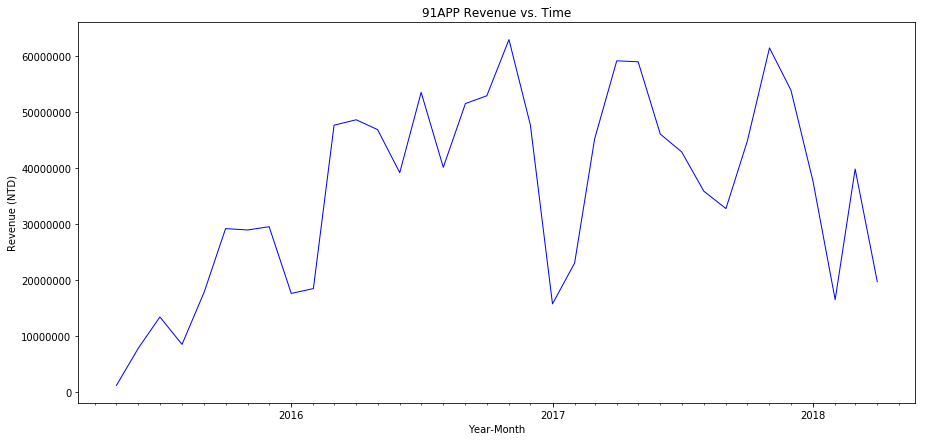

In [6]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

ax.plot(revenue_ym['YM'], revenue_ym['SalesOrderSlaveTotalPayment'], lw = 1, color = 'blue', alpha = 1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


ax.set_title('91APP Revenue vs. Time')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Revenue (NTD)')

We can see that over the course of 3 years, revenue is lower in the beginning of the year (January - March) but gets higher towards the end of the year (October - December).

## Question 2 (EDA): How many unique customers are there every month?

In [7]:
unique_member = df_orders[['DateId','MemberId']].copy()
unique_member['DateId'] = unique_member['DateId'].astype(str).apply(lambda x: datetime.strptime(x, '%Y%m%d'))
unique_member['YM'] = unique_member['DateId'].values.astype('datetime64[M]')
unique_member = unique_member.groupby('YM')['MemberId'].nunique().reset_index()

unique_member.head()

,YM,MemberId
0,2015-05-01,1176
1,2015-06-01,8488
2,2015-07-01,15311
3,2015-08-01,9643
4,2015-09-01,18145


Text(0,0.5,'No. of Unique Customers')

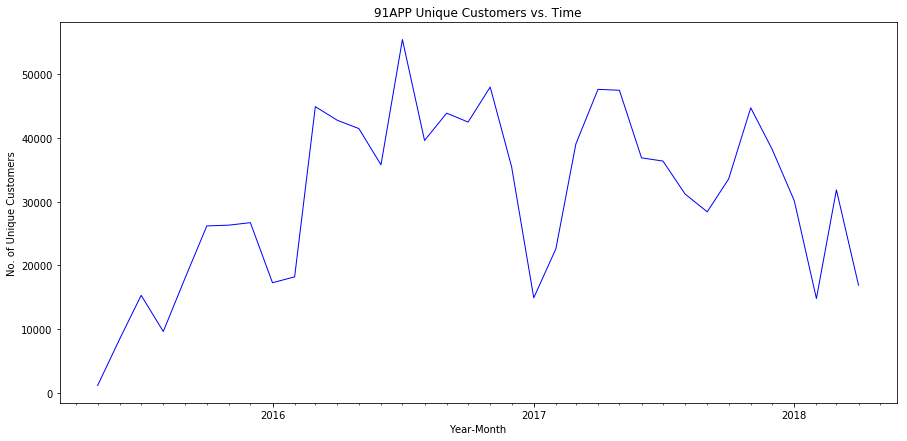

In [8]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

ax.plot(unique_member['YM'], unique_member['MemberId'], lw = 1, color = 'blue', alpha = 1)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))


ax.set_title('91APP Unique Customers vs. Time')
ax.set_xlabel('Year-Month')
ax.set_ylabel('No. of Unique Customers')

From this, we can infer that the pattern for the line chart resembles the pattern for revenue over time. Here we can hypothesize that the number of unique customers is correlated to revenue (per month).

## Question 3 (Follow-up question): Is there any correlation between number of unique customers and revenue?

This question is important, since if we know that the two are correlated, there is a high chance that increasing the number of unique customers can increase overall revenue (but may not always be the case, correlation does not equal causation).

In [9]:
revenue_member = revenue_ym.copy().merge(unique_member.copy(), on = 'YM')

revenue_member.head()

,YM,SalesOrderSlaveTotalPayment,MemberId
0,2015-05-01,1088629.0,1176
1,2015-06-01,7806371.0,8488
2,2015-07-01,13328028.0,15311
3,2015-08-01,8427733.0,9643
4,2015-09-01,17764823.0,18145


Text(0,0.5,'Revenue(NTD)')

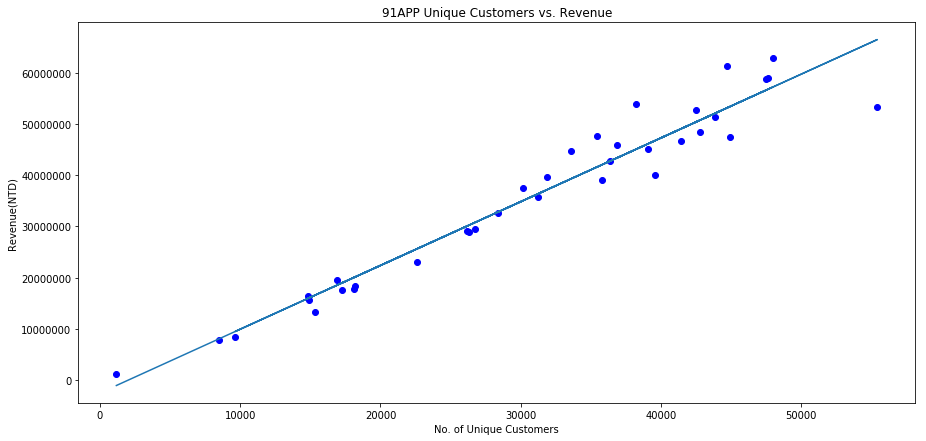

In [10]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

ax.scatter(revenue_member['MemberId'], revenue_member['SalesOrderSlaveTotalPayment'], c = 'blue', alpha = 1)
ax.plot(revenue_member['MemberId'], np.poly1d(np.polyfit(revenue_member['MemberId'], revenue_member['SalesOrderSlaveTotalPayment'], 1))(revenue_member['MemberId']))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_title('91APP Unique Customers vs. Revenue')
ax.set_xlabel('No. of Unique Customers')
ax.set_ylabel('Revenue(NTD)')

In [11]:
corrcoeff = revenue_member['MemberId'].corr(revenue_member['SalesOrderSlaveTotalPayment'])
corrcoeff

0.9704522253327079

It turns out that the number of unique customers is correlates to revenue. Furthermore, with a high correlation coefficient of 0.97, a change in the number of unique customers will have a very significant impact on revenue. As such, 91APP should also focus on the number of unique customers per month.

To dive deeper, we can investigate customers' spending pattern. If, for example, majority of the customers in a typical month are new buyers, then the company should focus on increasing the number of new buyers, which in turn will increase the number of unique customers and revenue.

In this case, we will be separating the customers by city.

Note:
1. We define an order as a purchase of 1 item.
2. We define a transaction as (a) purchase(s) of order(s) under the SAME shopping cart. Hence, a transaction may have multiple orders.
3. 1 transaction corresponds to 1 city.
4. If a customer's transactions are all made in 1 city, than the customer is said to be from that city.
5. If a customer's transactions are made in multiple cities, than the customer is said to be from the city with the most transactions. E.g. Customer A has 3 transactions in Taipei and 2 transactions in New Taipei. Therefore, Customer A is said to be from Taipei.

## Question 4 (EDA): Which cities are the customers from?

In [12]:
member_city = df_orders[['MemberId','OrderGroupCode','City']].copy().drop_duplicates().reset_index(drop = True)
#Counts the number of transactions for each customer and each city
member_city = member_city.groupby(['MemberId','City'])['OrderGroupCode'].nunique().reset_index()
#Sort by descending values of number of transaction
member_city.sort_values(by = ['MemberId','OrderGroupCode'], ascending = [True, False], inplace = True)
#Only keep the first occurence (i.e. the one with most number of transactions)
member_city.drop_duplicates(subset=['MemberId'], keep = 'first', inplace = True)
member_city.drop(columns = 'OrderGroupCode', inplace = True)

member_city.head()

,MemberId,City
0,1326,台北市
1,1329,台北市
2,1334,台北市
4,1336,台北市
5,1362,台北市


In [13]:
city_count = member_city['City'].copy().groupby(member_city['City']).size().reset_index(name='Count').sort_values(by = 'Count', ascending = False)
city_count

,City,Count
29,新北市,113059
17,台中市,82515
18,台北市,68587
37,高雄市,60080
32,桃園市,59556
19,台南市,43637
28,彰化縣,21617
30,新竹市,14692
27,屏東縣,14051
31,新竹縣,12971


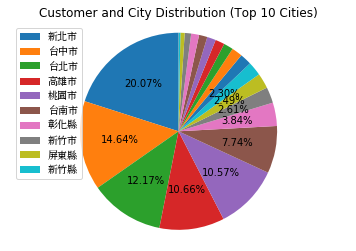

In [23]:
fig, ax = plt.subplots()

def autopct_custom(pct):
    return ('%1.2f%%' % pct) if pct > 2 else ''

patches, texts, autotexts = ax.pie(city_count['Count'],
                                   #labels = city_count['City'],
                                    autopct = autopct_custom,
                                    startangle = 90)

ax.legend(patches[:10], city_count['City'], loc = 'best', prop = prop)
ax.axis('equal')
ax.set_title('Customer and City Distribution (Top 10 Cities)')
plt.show()

We now know the city distribution for all the customers. However, does this distribution remain the same over time? If not, then the company should do further investigation. (E.g. If there are more Taipei customers in January than there are in June, we could investigate what happened in Taipei at June that causes lesser customers).

## Question 5 (Follow-up question): Does the city distribution of customers change over time?

In [27]:
classified_member = df_orders[['DateId','MemberId']].copy()
classified_member['DateId'] = classified_member['DateId'].astype(str).apply(lambda x: datetime.strptime(x, '%Y%m%d'))
classified_member['YM'] = classified_member['DateId'].values.astype('datetime64[M]')
classified_member = classified_member.merge(member_city, on = 'MemberId')

classified_member.loc[(~classified_member['City'].isin(city_count['City'].head())), 'City'] = '其他'
classified_member = classified_member.groupby(['YM','City'])['MemberId'].nunique().reset_index()
classified_member = classified_member.pivot(index = 'YM', columns = 'City', values = 'MemberId').reset_index()

classified_member.head()

City,YM,其他,台中市,台北市,新北市,桃園市,高雄市
0,2015-05-01,394,169,140,229,113,131
1,2015-06-01,2860,1147,848,1737,929,967
2,2015-07-01,5092,2193,1527,3159,1663,1676
3,2015-08-01,3235,1416,957,1928,1020,1087
4,2015-09-01,5719,2592,2162,3839,2024,1809


In [47]:
#classified_member_perc = ~classified_member['YM'].divide(~classified_member['YM'].sum(axis=1), axis=0)
data = classified_member.drop(columns = 'YM')
data_perc = data.divide(data.sum(axis=1), axis=0)*100
classified_member[classified_member.columns.drop('YM')] = data_perc
classified_member.head()

City,YM,其他,台中市,台北市,新北市,桃園市,高雄市
0,2015-05-01,33.503401,14.370748,11.904762,19.472789,9.608844,11.139456
1,2015-06-01,33.694628,13.513195,9.990575,20.464185,10.944863,11.392554
2,2015-07-01,33.259308,14.323971,9.973873,20.633573,10.862182,10.947093
3,2015-08-01,33.547651,14.684227,9.924297,19.993778,10.577621,11.272426
4,2015-09-01,31.518325,14.284927,11.915128,21.157344,11.154588,9.969689


Text(0,0.5,'Percentage (%)')

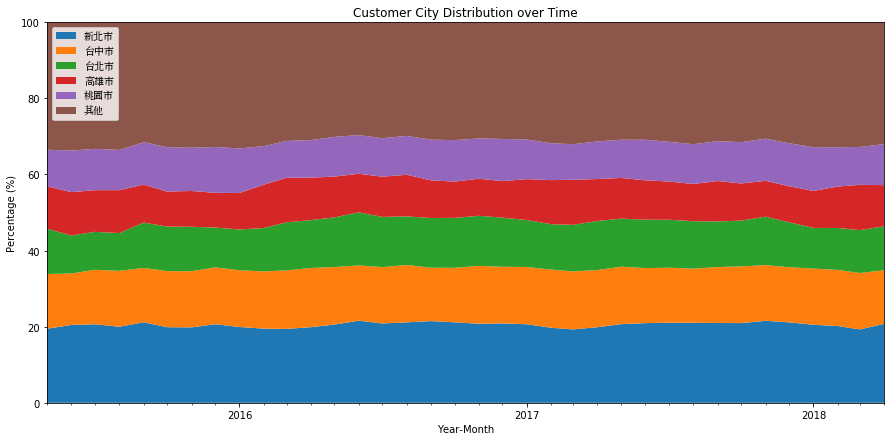

In [49]:
fig = plt.figure(figsize=(15, 7))
ax = fig.add_subplot(111)

ax.stackplot(classified_member['YM'],  classified_member['新北市'],  classified_member['台中市'],  classified_member['台北市']
             , classified_member['高雄市'], classified_member['桃園市'], classified_member['其他']
             , labels=['新北市','台中市','台北市','高雄市','桃園市','其他'])
ax.legend(loc='upper left', prop = prop)
ax.margins(0,0)
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax.set_title('Customer City Distribution over Time')
ax.set_xlabel('Year-Month')
ax.set_ylabel('Percentage (%)')

It turns out that there is barely any change in percentage, so there is not much correlation between time and customer count per region.